From Rxx, and Gideon, I learned about this applied SME signal boosting on quadradic funding. 

It means that the quadradic funding algorithm is weighted heavier from donors that qualify as SME.

Congrats to the TEC coordination team for pulling this off. They pulled this off on round 1.

Let's apply engineering to this process.

Engineering is about the production of artifacts in a safe and ethical way. 

Artifacts have interfaces that people may use. Engineering allows the usage of interfaces without bad things happening.



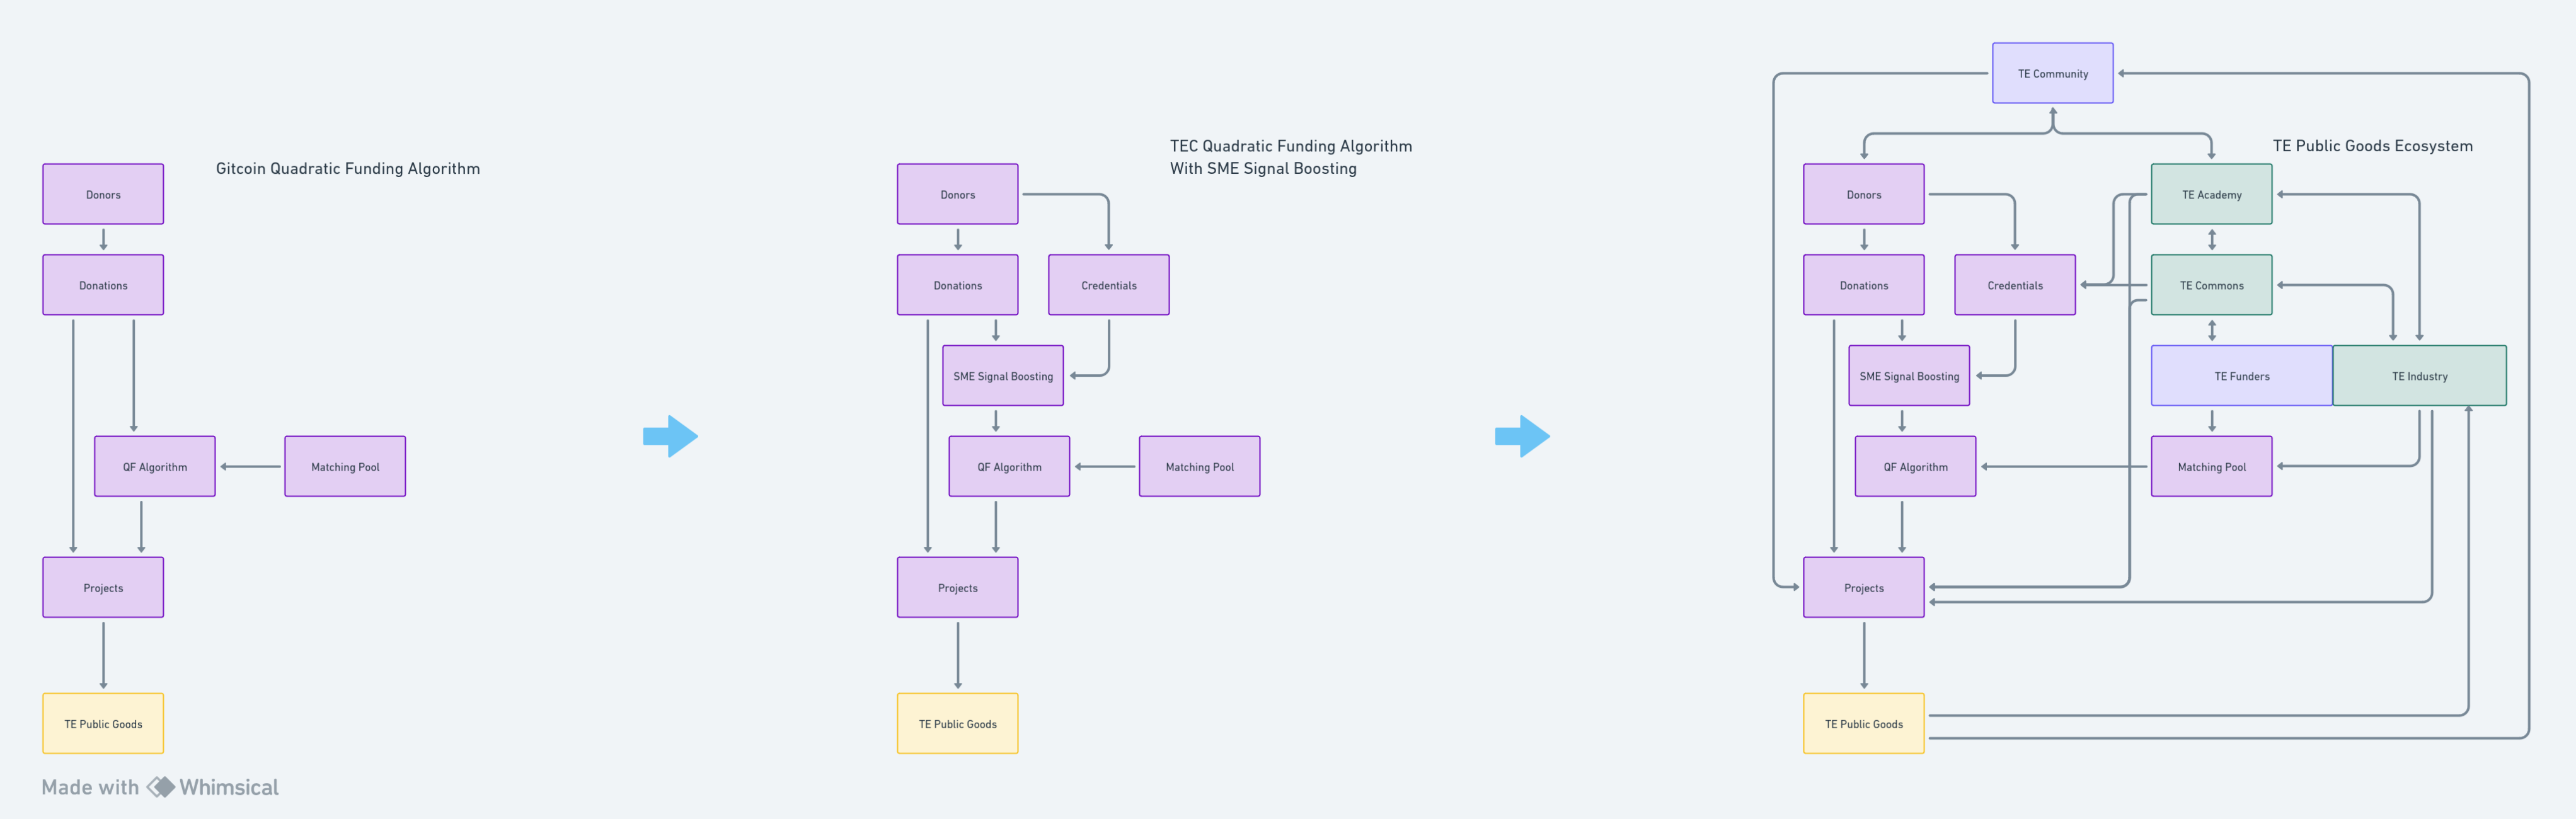![image.png]()

Link to the above board: https://whimsical.com/original-qfsme-mechanism-flowchart-QjXRdbkFmBcXBhnV175K9z 

Resources


* https://arxiv.org/pdf/2010.01193.pdf
* https://arxiv.org/pdf/1809.06421.pdf
* https://vitalik.ca/general/2019/12/07/quadratic.html
* https://qf.gitcoin.co/?grant=&grant=&grant=&match=1000
* https://medium.com/token-engineering-commons/expertise-and-quadratic-funding-bd4f0c5c3e23 

## A Flexible Design for Funding Public Goods

https://arxiv.org/pdf/1809.06421.pdf

### 3.0 Model

In [1]:
import numpy as np

# Number of Citizens in the Society
N = 30

# Society is a set of citizens
society = set(range(N))

# Community is a random subset of the society. The community size is from 1 up to 1/2 of the society.
community = np.random.choice(a=list(society), size=np.random.randint(1, len(society)/2), replace=False, p=None)

# Public Goods are proposed by community members. Cardinality is from 1 up to 1/2 size of the community.
public_goods = list(enumerate(np.random.choice(a=list(community), size=np.random.randint(1, len(community)/2), replace=True, p=None)))

In [2]:
community

array([ 8, 16, 25, 19, 10, 20,  0, 29, 15,  9,  6,  1,  2, 12])

In [3]:
public_goods

[(0, 20), (1, 29), (2, 1), (3, 6), (4, 0)]

In [4]:
len(society)

30

In [5]:
len(community)

14

In [6]:
len(public_goods)

5

### 3.1 Individual Preferences and Actions

In [7]:
import param
import numpy as np
import panel as pn
import hvplot.pandas
import pandas as pd

class ConcaveFunctionGenerator(param.Parameterized):
    f0 = param.Number(default=0.2, bounds=(0, 1), doc="Value of f(0)")
    f1 = param.Number(default=0.8, bounds=(0, 1), softbounds=(0, 1), doc="Value of f(1)")
    steepness = param.Number(default=5, bounds=(1, 20), doc="Steepness of the curve")

    def __init__(self, **params):
        super().__init__(**params)
        self._update_f1_bounds()

    @param.depends('f0', watch=True)
    def _update_f1_bounds(self):
        # Clip the value of f1 if it's below f0
        self.f1 = max(self.f0, self.f1)
        
        # Update the lower bound of f1 to be the value of f0
        self.param['f1'].bounds = (self.f0, 1)
        
    def x(self):
        return np.linspace(0, 1, 400)

    @param.depends('f0', 'f1', 'steepness')
    def f(self, x):
        # Using the negative exponential function as a base
        y = 1 - np.exp(-self.steepness * x)
        
        # Adjusting the function to start at f0 and end at f1
        y = self.f0 + (self.f1 - self.f0) * (y - y.min()) / (y.max() - y.min())
        
        return y

    @param.depends('f0', 'f1', 'steepness')
    def view(self):
        x = self.x()
        y = self.f(x)
        df = pd.DataFrame({'x': x, 'y': y})
        return df.hvplot.line(x='x', y='y', ylim=(0, 1.01))

concave_gen = ConcaveFunctionGenerator()
pn.Row(concave_gen.param, concave_gen.view).servable()


%opts magic unavailable (pyparsing cannot be imported)
%compositor magic unavailable (pyparsing cannot be imported)


Row
    [0] Column(margin=(5, 10), name='ConcaveFunctionGenerator'...)
        [0] StaticText(value='<b>ConcaveFunctionGenerat...)
        [1] FloatSlider(name='F0', value=0.2)
        [2] FloatSlider(name='F1', start=0.2, value=0.8)
        [3] FloatSlider(end=20, name='Steepness', start=1, value=5)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

In [8]:
ConcaveFunctionGenerator(f0=1,f1=0)

ConcaveFunctionGenerator(f0=1, f1=1, name='ConcaveFunctionGenerator00954', steepness=5)

In [9]:
import numbergen as ng
import numpy as np


# For CurveGenerator
def concave_function_generator():
    return dict(
        f0=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.1, sigma=0.3), bounds=(0,1))(),
        f1=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.5, sigma=0.4), bounds=(0,1))(),
        steepness=ng.UniformRandom(lbound=1, ubound=20)(),
    )

In [10]:
concave_function_generator()

{'f0': 0.11227153328261937, 'f1': 1, 'steepness': 14.264249927222568}

In [11]:
value_functions = [ConcaveFunctionGenerator(**concave_function_generator()) for p_i in range(len(public_goods)*len(society))]

In [12]:
import pandas as pd

pd.DataFrame([s.param.values() for s in value_functions])

sample_p_i = pn.widgets.IntSlider(name='Utility Value Function', start=0, end=len(value_functions)-1)

pn.Row(sample_p_i, pn.bind(lambda i: value_functions[i].view(), i=sample_p_i.param.value_throttled))

Row
    [0] IntSlider(end=149, name='Utility Value Function')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [13]:
df_value_functions = pd.DataFrame([s.f(s.x()) for s in value_functions]).T
df_value_functions.columns = [(p, i) for p in public_goods for i in society]
df_value_functions.columns.name = "value_p_i"
df_value_functions.index = np.linspace(0,1,len(df_value_functions))
df_value_functions.index.name = "funding"

In [14]:
df_value_functions

value_p_i,"((0, 20), 0)","((0, 20), 1)","((0, 20), 2)","((0, 20), 3)","((0, 20), 4)","((0, 20), 5)","((0, 20), 6)","((0, 20), 7)","((0, 20), 8)","((0, 20), 9)",...,"((4, 0), 20)","((4, 0), 21)","((4, 0), 22)","((4, 0), 23)","((4, 0), 24)","((4, 0), 25)","((4, 0), 26)","((4, 0), 27)","((4, 0), 28)","((4, 0), 29)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,0.013871,0.0,0.084063,0.000000,0.035482,0.293778,0.000000,0.094410,0.505028,0.168346,...,0.000000,0.165974,0.000000,0.000000,0.000000,0.208641,0.199866,0.142782,0.066021,0.000000
0.002506,0.057487,0.0,0.101630,0.013780,0.037315,0.301219,0.008411,0.099696,0.505152,0.174355,...,0.012167,0.165974,0.012389,0.004032,0.004042,0.208641,0.216787,0.153001,0.075442,0.002128
0.005013,0.099012,0.0,0.118409,0.027231,0.039142,0.308362,0.016560,0.104923,0.505274,0.180241,...,0.024160,0.165974,0.024320,0.008033,0.008038,0.208641,0.233351,0.162991,0.084689,0.004249
0.007519,0.138545,0.0,0.134435,0.040363,0.040962,0.315219,0.024455,0.110091,0.505395,0.186005,...,0.035980,0.165974,0.035810,0.012002,0.011988,0.208641,0.249565,0.172758,0.093764,0.006365
0.010025,0.176183,0.0,0.149743,0.053182,0.042774,0.321800,0.032104,0.115200,0.505514,0.191652,...,0.047631,0.165974,0.046875,0.015940,0.015893,0.208641,0.265436,0.182306,0.102670,0.008474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.923506,0.0,0.475922,0.579232,0.404474,0.479266,0.269979,0.557546,0.516239,0.461153,...,0.845195,0.165974,0.334994,0.488912,0.349199,0.208641,0.999986,0.599075,0.573906,0.500021
0.992481,0.923506,0.0,0.475922,0.579233,0.404864,0.479266,0.269979,0.557606,0.516241,0.461154,...,0.845236,0.165974,0.334994,0.489089,0.349242,0.208641,0.999990,0.599077,0.573911,0.500695
0.994987,0.923506,0.0,0.475922,0.579234,0.405252,0.479266,0.269979,0.557665,0.516243,0.461156,...,0.845276,0.165974,0.334994,0.489264,0.349284,0.208641,0.999993,0.599078,0.573917,0.501366


In [15]:
df_value_functions.hvplot.line(x='funding', color='blue', alpha=0.1, line_width=3, ylabel='Value to Citizens', title='Smooth, Concave, Increasing Value Functions')

:NdOverlay   [value_p_i]
   :Curve   [funding]   (value)

In [26]:
df_value_functions['mean'] = df_value_functions.mean(axis=1)
df_value_functions['std'] = df_value_functions.std(axis=1)
df_value_functions['low'] = df_value_functions['mean'] - df_value_functions['std']
df_value_functions['high'] = df_value_functions['mean'] + df_value_functions['std']

df_value_functions.hvplot.line(y='mean', ylabel='Value to Society') * df_value_functions.hvplot.area(y='low',y2='high', alpha=0.5, title='Mean Value to Society Given Funding')

:Overlay
   .Curve.I :Curve   [funding]   (mean)
   .Area.I  :Area   [funding]   (low,high)

In [27]:
df_value_functions.drop(['mean','std','low','high'],axis=1,inplace=True)

In [28]:
df_value_functions_melted = df_value_functions.melt(ignore_index=False)
df_value_functions_melted['public_good'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[0]).astype(str)
df_value_functions_melted['citizen'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[1]).astype(str)
df_value_functions_melted

,value_p_i,value,public_good,citizen
funding,,,,
0.000000,"((0, 20), 0)",0.013871,"(0, 20)",0
0.002506,"((0, 20), 0)",0.057487,"(0, 20)",0
0.005013,"((0, 20), 0)",0.099012,"(0, 20)",0
0.007519,"((0, 20), 0)",0.138545,"(0, 20)",0
0.010025,"((0, 20), 0)",0.176183,"(0, 20)",0
...,...,...,...,...
0.989975,"((4, 0), 29)",0.500021,"(4, 0)",29
0.992481,"((4, 0), 29)",0.500695,"(4, 0)",29
0.994987,"((4, 0), 29)",0.501366,"(4, 0)",29


In [29]:
mean_utility_df = df_value_functions_melted.groupby(['funding', 'public_good'])[['value']].mean().reset_index()

In [30]:
mean_utility_df

,funding,public_good,value
0,0.0,"(0, 20)",0.128873
1,0.0,"(1, 29)",0.068191
2,0.0,"(2, 1)",0.148240
3,0.0,"(3, 6)",0.167229
4,0.0,"(4, 0)",0.110403
...,...,...,...
1995,1.0,"(0, 20)",0.562908
1996,1.0,"(1, 29)",0.513630
1997,1.0,"(2, 1)",0.597494
1998,1.0,"(3, 6)",0.464730


In [32]:
mean_utility_df.hvplot.line(y='value', by='public_good', alpha=0.8, line_width=4, x='funding', title='Mean Value to Society per Public Good Given Funding')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)